#EDGE DETECTION

Canny edge detection

Original



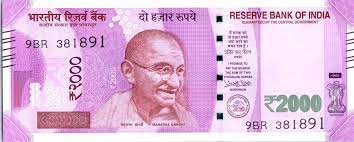



edge



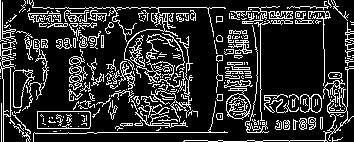

In [1]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread("currency.jpg") # Read image

# Setting parameter values
t_lower = 70 # Lower Threshold
t_upper = 200 # Upper threshold

# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)
print('Original\n')
cv2_imshow(img)
print('\n')
print('edge\n')
cv2_imshow(edge)
cv2.waitKey(0)
cv2.destroyAllWindows()


Hough Transform

In [19]:
import sys
import math
import cv2 as cv
import numpy as np
def hough():
    
    src = cv2.imread("currency.jpg") # Read image

    # Check if image is loaded fine
    if src is None:
        print ('Error opening image!')
        print ('Usage: hough_lines.py [image_name -- default ' + default_file + '] \n')
        return -1
    
    
    dst = cv.Canny(src, 50, 200, None, 3)
    
    # Copy edges to the images that will display the results in BGR
    cdst = cv.cvtColor(dst, cv.COLOR_GRAY2BGR)
    cdstP = np.copy(cdst)
    
    lines = cv.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)
    
    if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv.line(cdst, pt1, pt2, (0,0,255), 3, cv.LINE_AA)
    
    
    linesP = cv.HoughLinesP(dst, 1, np.pi / 180, 50, None, 50, 10)
    
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
    
    cv2_imshow("Source", src)
    cv2_imshow("Detected Lines (in red) - Standard Hough Line Transform", cdst)
    cv2_imshow("Detected Lines (in red) - Probabilistic Line Transform", cdstP)
    
    cv.waitKey()
    return 0


In [20]:
if __name__ == "__main__":
    hough()

TypeError: ignored

OTSU'S ALGORITHM

Otsu Threshold


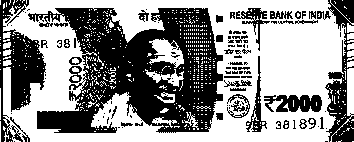

In [41]:

# organizing imports
import cv2
from google.colab.patches import cv2_imshow		
import numpy as np	

# path to input image is specified and
# image is loaded with imread command
image1 = cv2.imread('currency.jpg')

# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying Otsu thresholding
# as an extra flag in binary
# thresholding	
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY +
											cv2.THRESH_OTSU)	

# the window showing output image		
# with the corresponding thresholding		
# techniques applied to the input image
print('Otsu Threshold')	
cv2_imshow(thresh1)		
	
# De-allocate any associated memory usage		
if cv2.waitKey(0) & 0xff == 27:
	cv2.destroyAllWindows()	


#Region based Segmentation

Sobel transform

Text(0.5, 1.0, 'elevation_map')

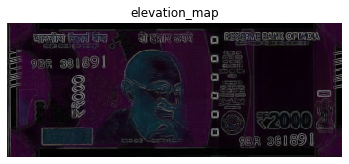

In [42]:
from skimage.filters import sobel
coins=cv2.imread('currency.jpg')
elevation_map = sobel(coins)
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')


Image segmentation using Morphological operations in Python

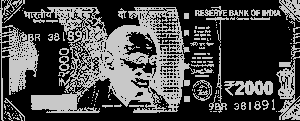

In [ ]:
# Python program to transform an image using
# threshold.
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Image operation using thresholding
img = cv2.imread('currency.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 200,
							cv2.THRESH_BINARY_INV +
							cv2.THRESH_OTSU)
cv2_imshow(thresh)


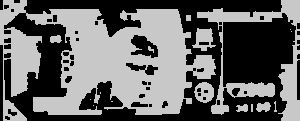

In [ ]:
# Noise removal using Morphological
# closing operation
kernel = np.ones((2, 2), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE,
							kernel, iterations = 2)

# Background area using Dilation
bg = cv2.dilate(closing, kernel, iterations = 1)

# Finding foreground area
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 0)
ret, fg = cv2.threshold(dist_transform, 0.01
						* dist_transform.max(), 200, 0)

cv2_imshow(fg)


Kmeans clustering 

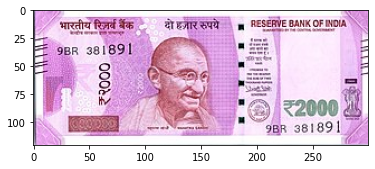

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('currency.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)


In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


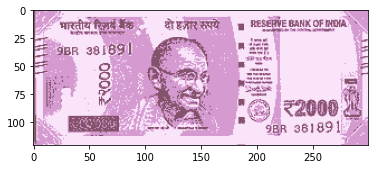

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering wit h number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)


In [43]:
import argparse
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage import color
from mpl_toolkits.mplot3d import Axes3D


def edgesMarrHildreth(img, sigma):
    """
            finds the edges using MarrHildreth edge detection method...
            :param im : input image
            :param sigma : sigma is the std-deviation and refers to the spread of gaussian
            :return:
            a binary edge image...
    """
    size = int(2*(np.ceil(3*sigma))+1)

    x, y = np.meshgrid(np.arange(-size/2+1, size/2+1),
                       np.arange(-size/2+1, size/2+1))

    normal = 1 / (2.0 * np.pi * sigma**2)

    kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
        np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

    kern_size = kernel.shape[0]
    log = np.zeros_like(img, dtype=float)

    # applying filter
    for i in range(img.shape[0]-(kern_size-1)):
        for j in range(img.shape[1]-(kern_size-1)):
            window = img[i:i+kern_size, j:j+kern_size] * kernel
            log[i, j] = np.sum(window)

    log = log.astype(np.int64, copy=False)

    zero_crossing = np.zeros_like(log)

    # computing zero crossing
    for i in range(log.shape[0]-(kern_size-1)):
        for j in range(log.shape[1]-(kern_size-1)):
            if log[i][j] == 0:
                if (log[i][j-1] < 0 and log[i][j+1] > 0) or (log[i][j-1] < 0 and log[i][j+1] < 0) or (log[i-1][j] < 0 and log[i+1][j] > 0) or (log[i-1][j] > 0 and log[i+1][j] < 0):
                    zero_crossing[i][j] = 255
            if log[i][j] < 0:
                if (log[i][j-1] > 0) or (log[i][j+1] > 0) or (log[i-1][j] > 0) or (log[i+1][j] > 0):
                    zero_crossing[i][j] = 255

    # plotting images
    fig = plt.figure()
    a = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(log, cmap='gray')
    a.set_title('Laplacian of Gaussian')
    a = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(zero_crossing, cmap='gray')
    string = 'Zero Crossing sigma = '
    string += (str(sigma))
    a.set_title(string)
    plt.show()

    return log, zero_crossing


def main():
    oparser = argparse.ArgumentParser(description="Marr-Hildreth Edge detector")
    oparser.add_argument("--input", dest="input_image", required=True,
                         help="Path containing the image")
    oparser.add_argument("--output", dest="output_image", required=True,
                         help="Path containing the image")
    oparser.add_argument("--sigma", dest="sigma", default=3, required=False,
                         help="Sigma threshold", type=int)
    options = oparser.parse_args()

    img = io.imread(options.input_image)
    img = color.rgb2gray(img)

    log, zero_crossing = edgesMarrHildreth(img, options.sigma)

    io.imsave(f'{options.output_image}_{options.sigma}_log.jpg', log)
    io.imsave(f'{options.output_image}_{options.sigma}_zero_crossing.jpg', zero_crossing)

main()

usage: ipykernel_launcher.py [-h] --input INPUT_IMAGE --output OUTPUT_IMAGE
                             [--sigma SIGMA]
ipykernel_launcher.py: error: the following arguments are required: --input, --output


SystemExit: ignored

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Edge-based image segmentation algorithms

i. Robert operator: It highlights regions of high spatial frequency

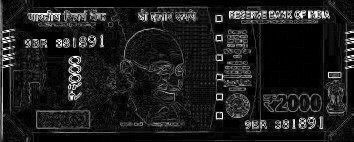

In [68]:
import cv2 
import numpy as np
from scipy import ndimage
  
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread("currency.jpg",0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2_imshow(edged_img)

ii. Prewitt operator: It is used for detecting vertical and horizontal edges in images

iii. Sobel operator: It is used for detecting vertical and horizontal edges in images. Similar to Prewitt

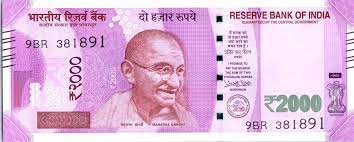

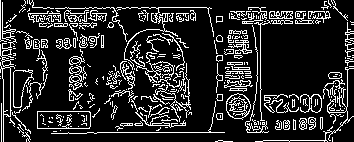

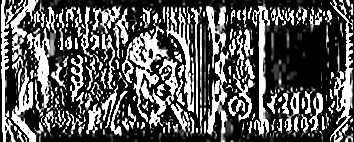

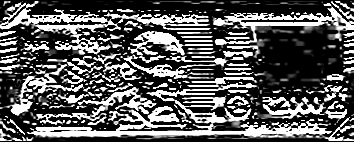

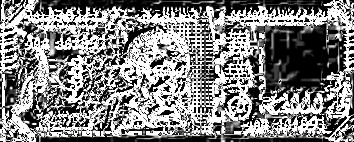

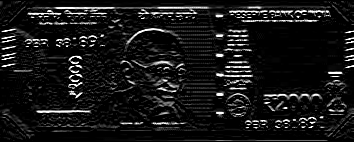

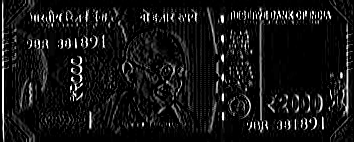

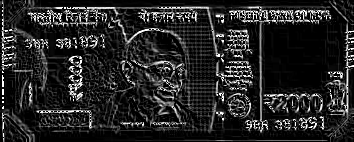

In [40]:
import cv2
import numpy as np

img = cv2.imread('currency.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(gray,cv2.CV_8U,1,0,ksize=5)
img_sobely = cv2.Sobel(gray,cv2.CV_8U,0,1,ksize=5)
img_sobel = img_sobelx + img_sobely


#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(gray, -1, kernelx)
img_prewitty = cv2.filter2D(gray, -1, kernely)


cv2_imshow(img)
cv2_imshow(img_canny)
cv2_imshow(img_sobelx)
cv2_imshow(img_sobely)
cv2_imshow(img_sobel)
cv2_imshow(img_prewittx)
cv2_imshow(img_prewitty)
cv2_imshow(img_prewittx + img_prewitty)

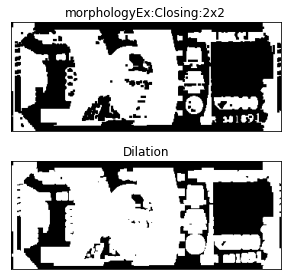

In [36]:
# WateShed SEGMENTATION
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'currency.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

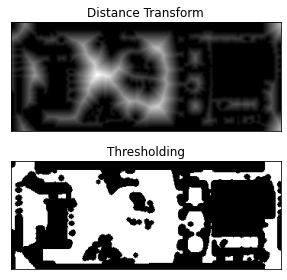

In [37]:
plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

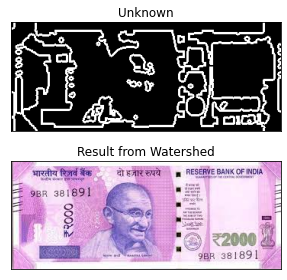

In [38]:
plt.subplot(211),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

In [49]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

Hough transform – detecting lines and circles

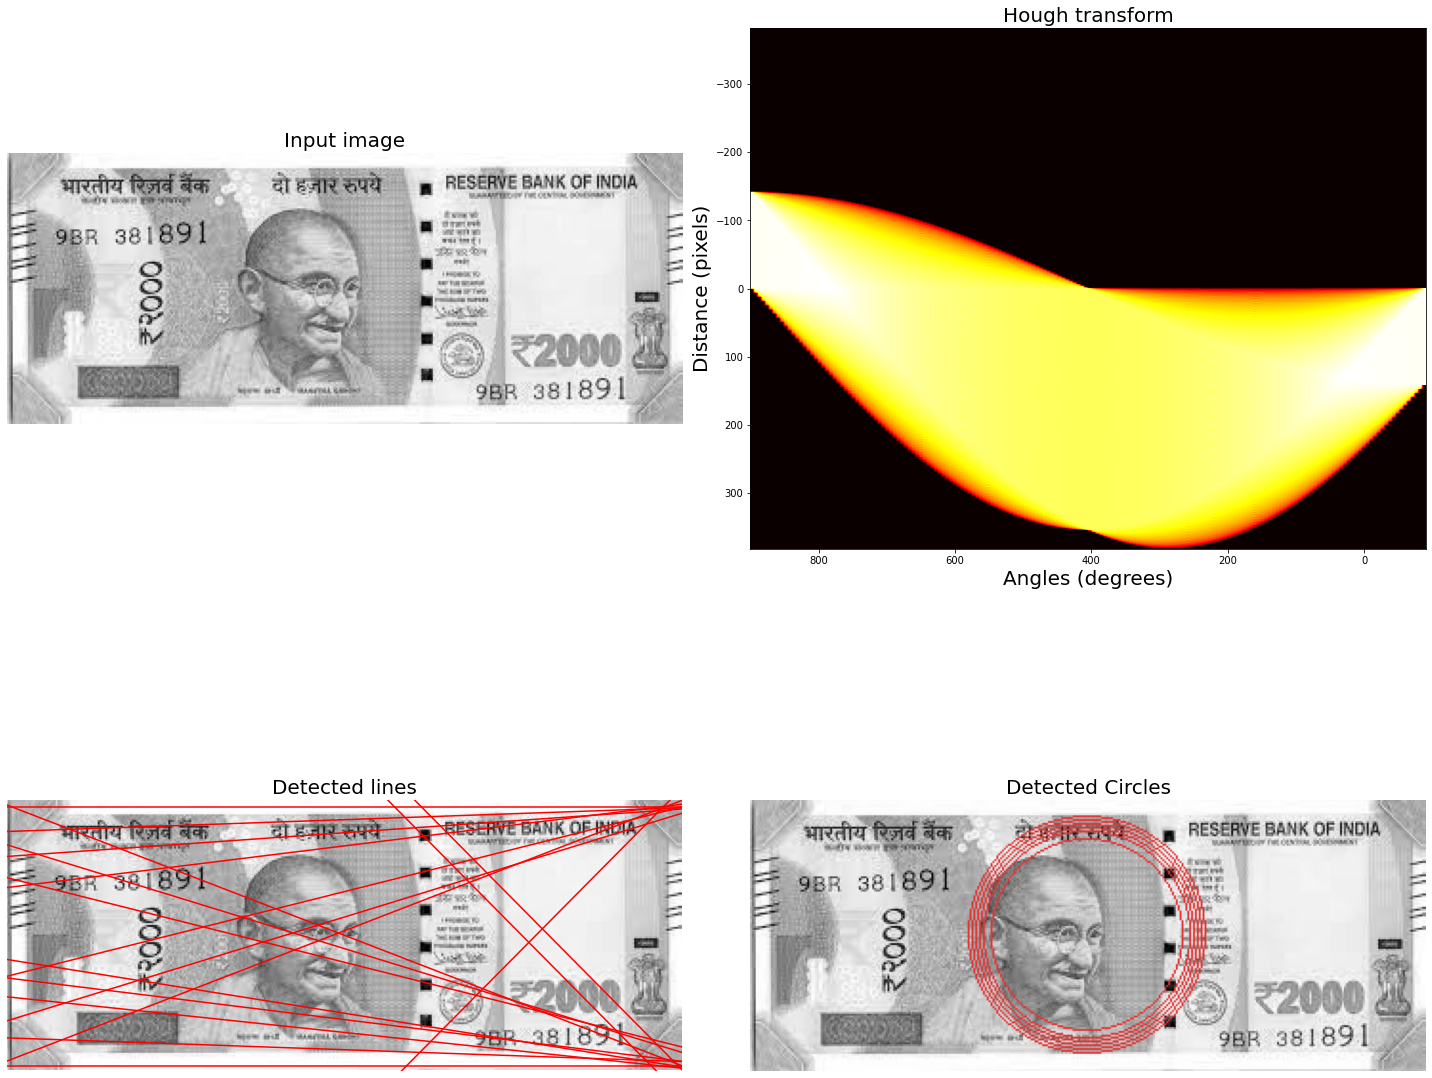

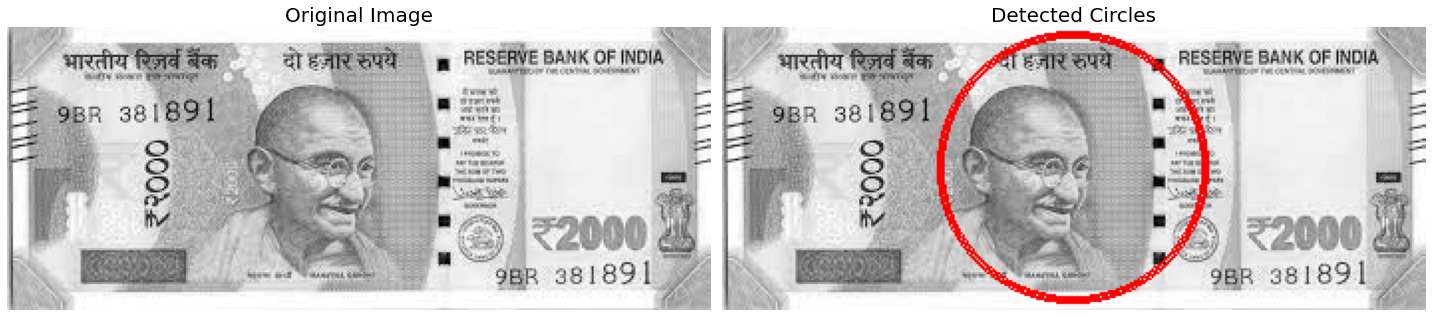

In [50]:
image = rgb2gray(imread('currency.jpg'))

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image', size=20)
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.hot, aspect=1/1.5)
ax[1].set_title('Hough transform', size=20)
ax[1].set_xlabel('Angles (degrees)', size=20)
ax[1].set_ylabel('Distance (pixels)', size=20)
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines', size=20)

hough_radii = np.arange(50, 100, 2)
hough_res = hough_circle(image, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=6)

image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (0.9, 0.2, 0.2)

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].set_axis_off()
ax[3].set_title('Detected Circles', size=20)

plt.tight_layout()
plt.show()

image = rgb2gray(imread('currency.jpg'))

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[0].set_title('Original Image', size=20)

hough_radii = np.arange(65, 75, 1)
hough_res = hough_circle(image, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4)

image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (1, 0, 0)

ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].set_axis_off()
ax[1].set_title('Detected Circles', size=20)

plt.tight_layout()
plt.show()

Thresholding and Otsu's segmentation

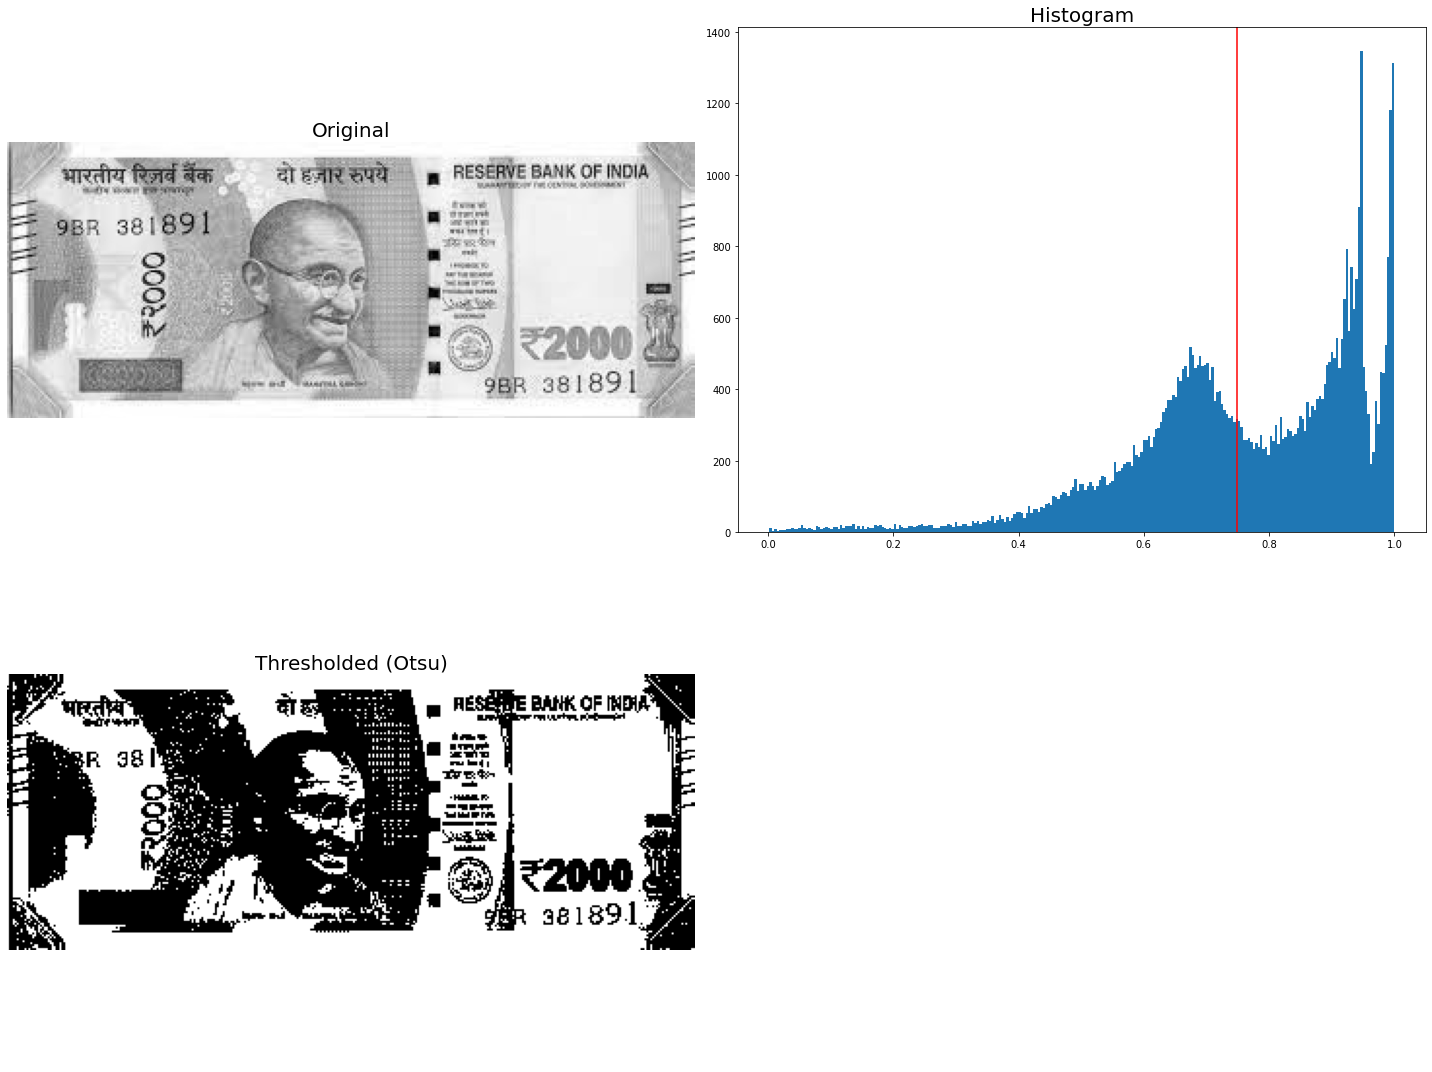

In [52]:
image =  rgb2gray(imread('currency.jpg')) 
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax = axes.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3, sharex=ax[0], sharey=ax[0])
ax[3] = plt.subplot(2, 2, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original', size=20)
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram', size=20)
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (Otsu)', size=20)
ax[2].axis('off')

ax[3].axis('off')

plt.tight_layout()
plt.show()

Felzenszwalb's efficient graph-based image segmentation

In [53]:
from skimage.data import astronaut
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.util import img_as_float

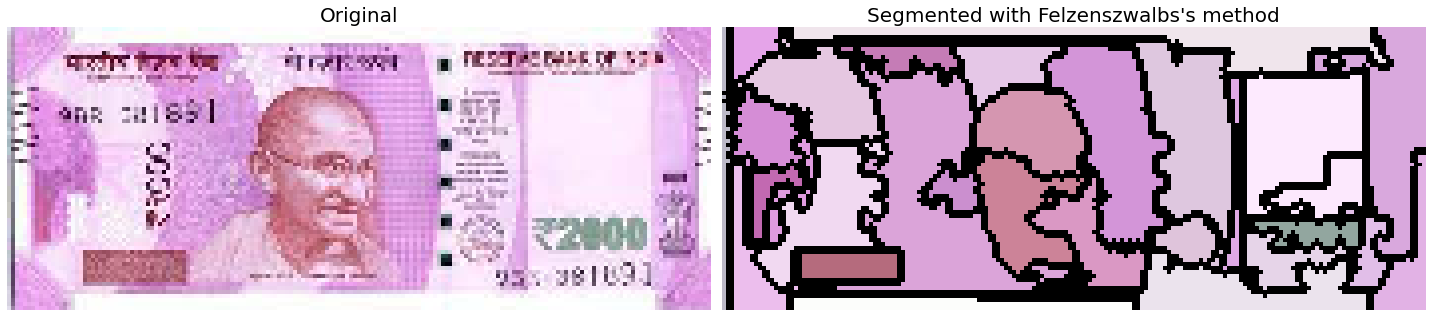

In [54]:
from matplotlib.colors import LinearSegmentedColormap
for imfile in ['currency.jpg']:
    img = img_as_float(imread(imfile)[::2, ::2, :3])
    plt.figure(figsize=(20,10))
    segments_fz = felzenszwalb(img, scale=100, sigma=0.5, min_size=100) #300
    borders = find_boundaries(segments_fz)
    unique_colors = np.unique(segments_fz.ravel())
    segments_fz[borders] = -1 #len(unique_colors)
    colors = [np.zeros(3)]
    for color in unique_colors:
        colors.append(np.mean(img[segments_fz == color], axis=0))    
    cm = LinearSegmentedColormap.from_list('pallete', colors, N=len(colors))
    plt.subplot(121)
    plt.imshow(img)
    plt.title('Original', size=20)
    plt.axis('off') 
    plt.subplot(122)
    plt.imshow(segments_fz, cmap=cm)
    plt.title('Segmented with Felzenszwalbs\'s method', size=20)
    plt.axis('off')   
    plt.tight_layout()
    plt.show()

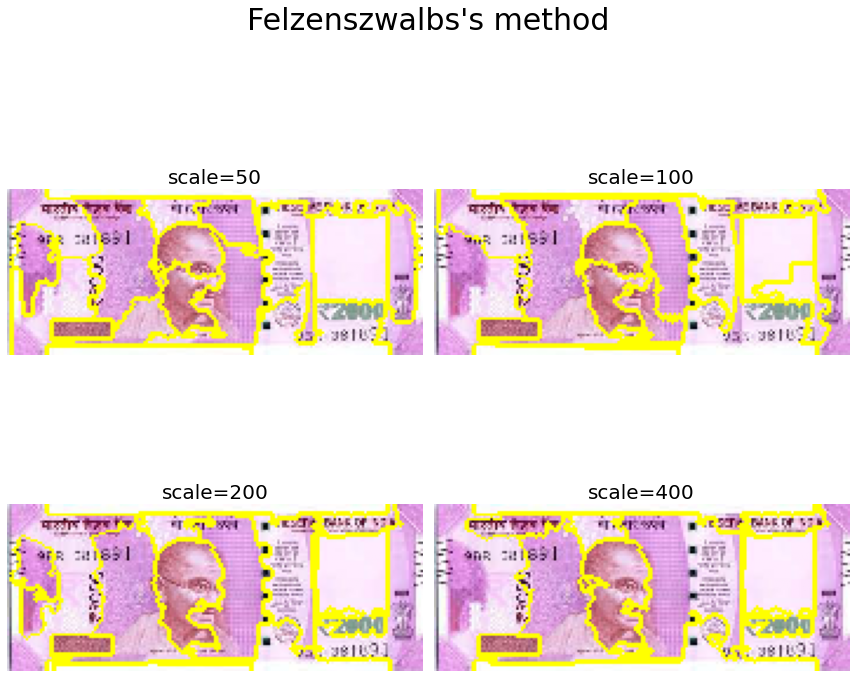

In [55]:
def plot_image(img, title):
    plt.imshow(img)
    plt.title(title, size=20)
    plt.axis('off')    
    
img = imread('currency.jpg')[::2, ::2, :3] #img_as_float(astronaut()[::2, ::2])

plt.figure(figsize=(12,12))
i = 1
for scale in [50, 100, 200, 400]:
    plt.subplot(2,2,i)
    segments_fz = felzenszwalb(img, scale=scale, sigma=0.5, min_size=200)
    plot_image(mark_boundaries(img, segments_fz), 'scale=' + str(scale))
    i += 1
plt.suptitle('Felzenszwalbs\'s method', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Segmentation with SLIC

<ipython-input-56-eab680668f38>:5: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments_slic = slic(img, n_segments=250, compactness=compactness, sigma=1)


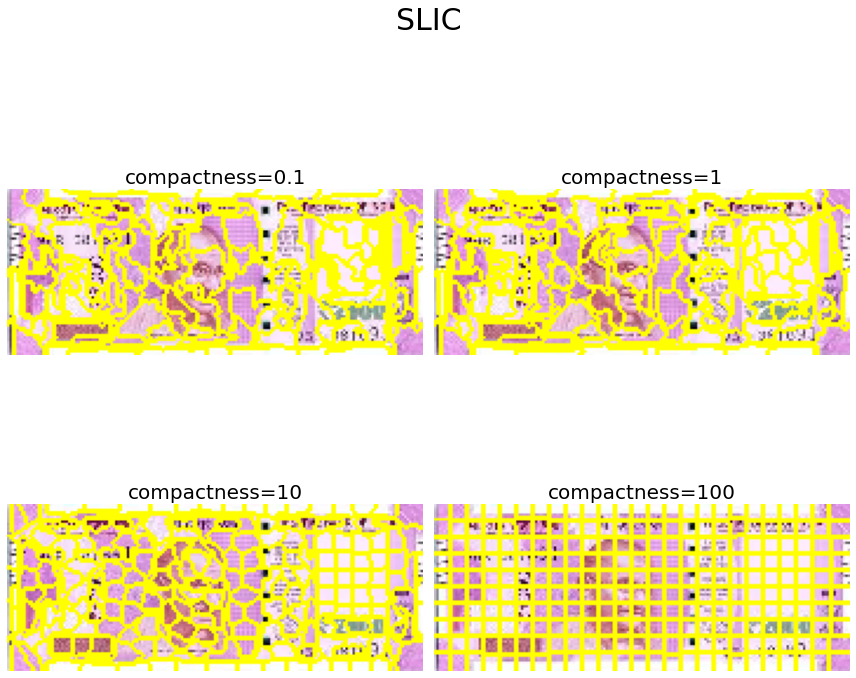

In [56]:
plt.figure(figsize=(12,12))
i = 1
for compactness in [0.1, 1, 10, 100]:
    plt.subplot(2,2,i)
    segments_slic = slic(img, n_segments=250, compactness=compactness, sigma=1)
    plot_image(mark_boundaries(img, segments_slic), 'compactness=' + str(compactness))
    i += 1
plt.suptitle('SLIC', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Segmentation with QuickShift

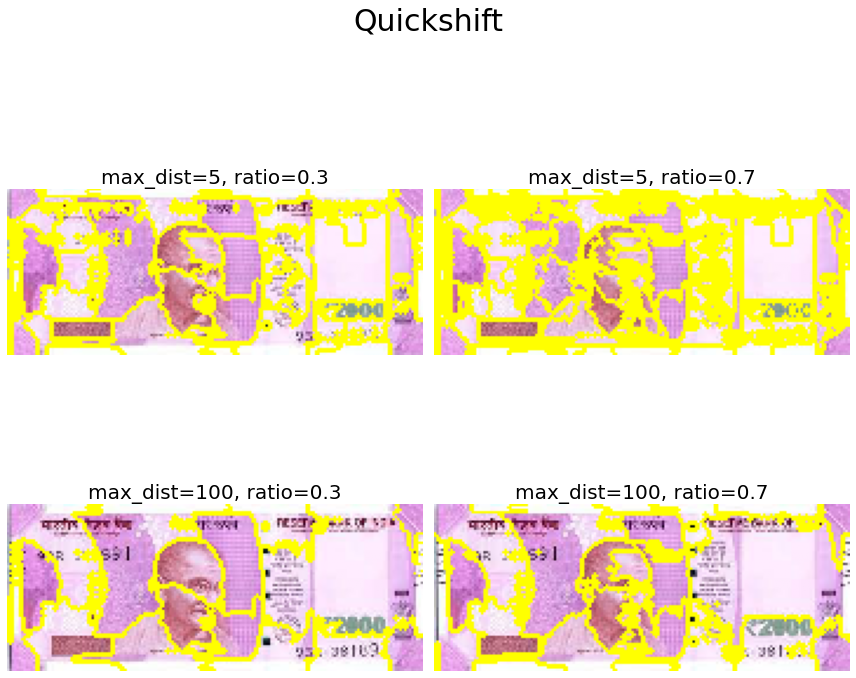

In [57]:
plt.figure(figsize=(12,12))
i = 1
for max_dist in [5, 100]:
    for ratio in [0.3, 0.7]:
        plt.subplot(2,2,i)
        segments_quick = quickshift(img, kernel_size=3, max_dist=max_dist, ratio=ratio)
        plot_image(mark_boundaries(img, segments_quick), 'max_dist=' + str(max_dist) + ', ratio=' + str(ratio))
        i += 1
plt.suptitle('Quickshift', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Segmentation with Watershed

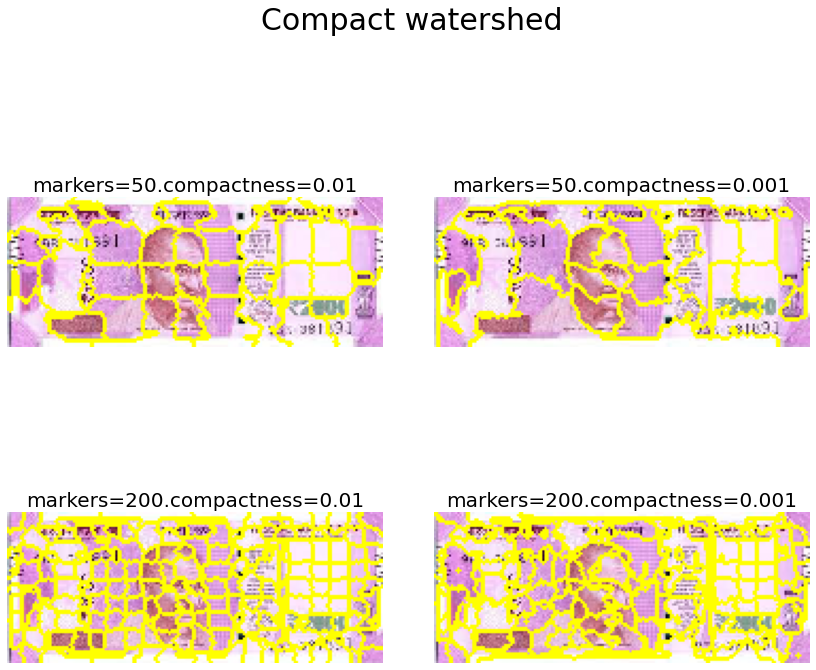

In [58]:
gradient = sobel(rgb2gray(img))
plt.figure(figsize=(12,12))
i = 1
for markers in [50, 200]:
    for compactness in [0.01, 0.001]:
        plt.subplot(2,2,i)
        segments_watershed = watershed(gradient, markers=markers, compactness=compactness)
        plot_image(mark_boundaries(img, segments_watershed), 'markers=' + str(markers) + '.compactness=' + str(compactness))
        i += 1
plt.suptitle('Compact watershed', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

K-means clustering for image segmentation with color quantization

((0.0, 1.0, 0.0, 1.0),
 Text(0.5, 1.0, 'Original image (256 colors)'),
 <matplotlib.image.AxesImage at 0x7fc1fa306a60>)

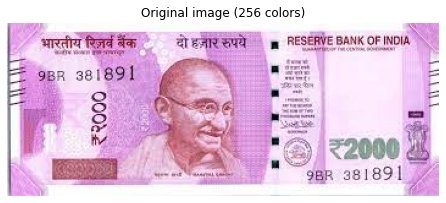

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from skimage.io import imread
from sklearn.utils import shuffle
from skimage import img_as_float
from time import time

pepper = imread("currency.jpg")

# Display the original image
plt.figure(1), plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off'), plt.title('Original image (%d colors)' %(len(np.unique(pepper)))), plt.imshow(pepper)

done in 0.513s.
Predicting color indices on the full image (k-means)
done in 0.207s.
done in 1.097s.
Predicting color indices on the full image (k-means)
done in 0.014s.
done in 1.416s.
Predicting color indices on the full image (k-means)
done in 0.004s.
done in 0.049s.
Predicting color indices on the full image (k-means)
done in 0.003s.


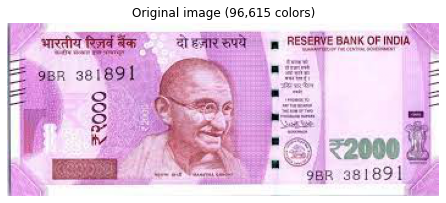

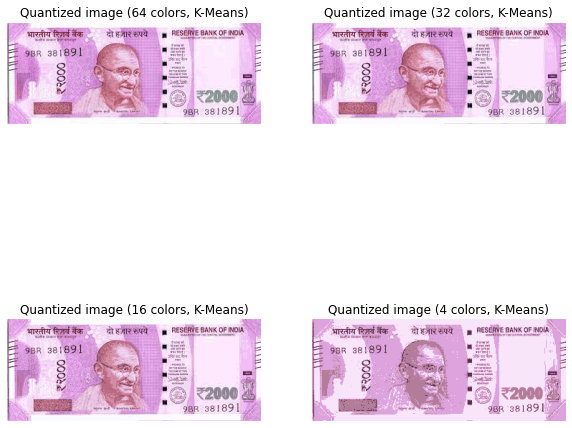

Predicting color indices on the full image (random)
done in 0.077s.
Predicting color indices on the full image (random)
done in 0.035s.
Predicting color indices on the full image (random)
done in 0.022s.
Predicting color indices on the full image (random)
done in 0.012s.


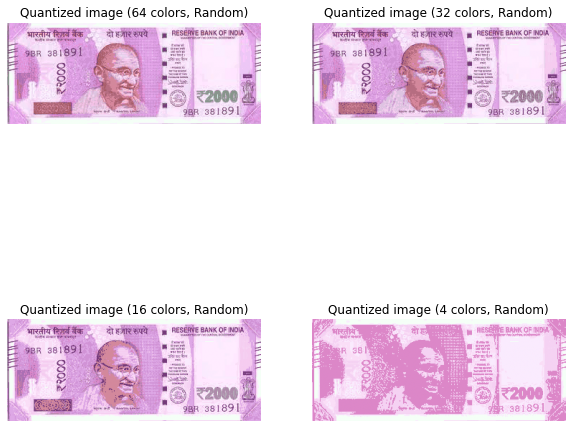

In [67]:
n_colors = 64

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
pepper = np.array(pepper, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(pepper.shape)
assert d == 3
image_array = np.reshape(pepper, (w * h, d))

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(pepper)

plt.figure(2, figsize=(10,10))
plt.clf()
i = 1
for k in [64, 32, 16, 4]:
    t0 = time()
    plt.subplot(2,2,i)
    plt.axis('off')
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))
    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    plt.title('Quantized image (' + str(k) + ' colors, K-Means)')
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    i += 1
plt.show()

        
plt.figure(3, figsize=(10,10))
plt.clf()
i = 1
for k in [64, 32, 16, 4]:
    t0 = time()
    plt.subplot(2,2,i)
    plt.axis('off')
    codebook_random = shuffle(image_array, random_state=0)[:k + 1]
    print("Predicting color indices on the full image (random)")
    t0 = time()
    labels_random = pairwise_distances_argmin(codebook_random,
                                              image_array,
                                              axis=0)
    print("done in %0.3fs." % (time() - t0))    
    plt.title('Quantized image (' + str(k) + ' colors, Random)')
    plt.imshow(recreate_image(codebook_random, labels_random, w, h))
    i += 1
plt.show()
     


Laplacian Edge Detector

The Laplacian edge detector compares an image’s second derivatives. It counts the number of times the first derivative changes in a single pass.

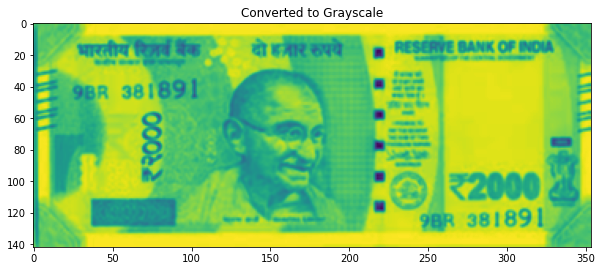

In [70]:
original_img = cv2.imread('currency.jpg',cv2.IMREAD_COLOR)
gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
blur_img = cv2.GaussianBlur(gray,(3,3),0)

plt.figure(figsize=(10,10))
plt.imshow(blur_img)
plt.title("Converted to Grayscale")
plt.show()


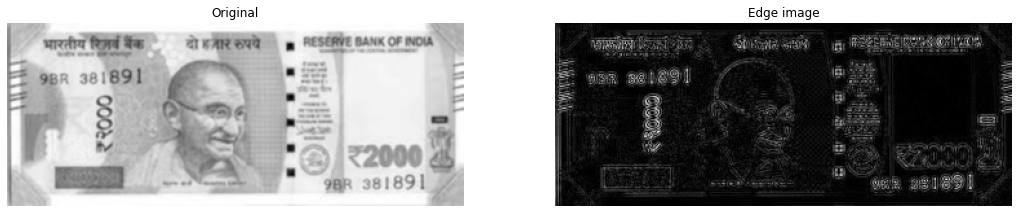

In [71]:
laplacian = cv2.Laplacian(blur_img,5,cv2.CV_64F)
filtered_image = cv2.convertScaleAbs(laplacian)
plt.figure(figsize=(18,19))
plt.subplot(121)
plt.imshow(blur_img, cmap='gray')
plt.title('Original') 
plt.axis("off")
 
plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('Edge image')
plt.axis("off")
plt.show()